# 202347011 김연욱
 - 2023년 머신러닝 프로젝트
 - YOLOv5

## 구글 드라이브 연결

In [ ]:
#구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## YOLOv5 git clone

In [ ]:
# 내 구글 드라이브로 이동
# %cd "/content/drive/MyDrive"

# 구글 드라이브는 already exists 발생할 수 있음
# 그래서 런타임 끊기면 초기화 되는 위치('/contet')로
%cd '/content'

# 현재 위치에 yolov5 git clone하기
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16083, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 16083 (delta 7), reused 12 (delta 1), pack-reused 16056
Receiving objects: 100% (16083/16083), 14.65 MiB | 4.57 MiB/s, done.
Resolving deltas: 100% (11039/11039), done.


---

## 필수 라이브러리 설치

In [ ]:
%cd '/content/yolov5'

%pip install --upgrade --force-reinstall -qr requirements.txt

# pip install option
# -q : 더 적은 출력 (간단한 출력)
# -r <파일> : 주어진 요구 사항 파일에서 설치
# --upgrade : 업그레이드
# --force-reinstall

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.6/283.6 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 119.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━

---

## 버전 확인

In [ ]:
import torch
import utils

# 파이토치 버전 확인, cuda device properties 확인
# print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

display = utils.notebook_init()  # 버전 확인 및 detect이후 Image 출력을 위한 선언

YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.6/78.2 GB disk)


In [ ]:
import cv2

#오픈cv 버전 확인

print(cv2.__version__)

4.8.1


---

## Data Set

In [ ]:
from glob import glob

train_img_list = glob('/content/drive/MyDrive/머신러닝YOLO/dataset/train/images/*.jpg')
valid_img_list = glob('/content/drive/MyDrive/머신러닝YOLO/dataset/valid/images/*.jpg')

print(len(train_img_list))
print(len(valid_img_list))

1347
251


In [ ]:
# 사이킷런을 활용한 데이터 나누기
# from sklearn.model_selection import train_test_split
# train_img_list, valid_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)


# train, valid, test로 이미지와 라벨을 분류한 경우
# mul: 사용할 데이터 비율
mul = 0.33 # 33% 사용하기

train_img_list = train_img_list[:(int)(len(train_img_list) * mul)]
valid_img_list = train_img_list[:(int)(len(valid_img_list) * mul)]

print(len(train_img_list), len(valid_img_list))

444 82


In [ ]:
# 이미지 리스트 작성

with open('/content/drive/MyDrive/머신러닝YOLO/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
with open('/content/drive/MyDrive/머신러닝YOLO/valid.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
import yaml

with open('/content/drive/MyDrive/머신러닝YOLO/data.yaml', 'r') as f:
    data = yaml.full_load(f)
    # 다음 구문도 활용 가능
    # data = yaml.load(f, Loader = yaml.FullLoader)
    # data = yaml.safe_load(f) # 파일을 신뢰할 수 없는 경우 유용

print(data)

data['train'] = '/content/drive/MyDrive/머신러닝YOLO/train.txt'
data['val'] = '/content/drive/MyDrive/머신러닝YOLO/valid.txt'

with open('/content/drive/MyDrive/머신러닝YOLO/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'names': ['person', 'wheelchair'], 'nc': 2, 'train': '/content/drive/MyDrive/머신러닝YOLO/train.txt', 'val': '/content/drive/MyDrive/머신러닝YOLO/valid.txt'}
{'names': ['person', 'wheelchair'], 'nc': 2, 'train': '/content/drive/MyDrive/머신러닝YOLO/train.txt', 'val': '/content/drive/MyDrive/머신러닝YOLO/valid.txt'}


## 모델 학습 (Train)

In [ ]:
# %cd /content/yolov5/

!python train.py --data /content/drive/MyDrive/머신러닝YOLO/data.yaml \
                 --cfg /content/yolov5/models/yolov5s.yaml \
                 --weights yolov5s.pt \
                 --name trainResult \
                 --batch 64 \
                 --epochs 50

2023-12-03 11:45:41.221987: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 11:45:41.222050: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 11:45:41.222090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/머신러닝YOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, si

In [ ]:
# 드라이브저장

!cp -r /content/yolov5/runs/train/trainResult /content/drive/MyDrive/머신러닝YOLO/trainResult

---

## 모델 테스트 (Detect)

detect: weights=['/content/drive/MyDrive/머신러닝YOLO/result/weights/best.pt'], source=/content/drive/MyDrive/머신러닝YOLO/dataset/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detectResult, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /content/drive/MyDrive/머신러닝YOLO/dataset/test/images/GH010096_frame7920_jpg.rf.81f677306ae14a0042fead009af398e8.jpg: 640x640 1 person, 12.7ms
image 2/150 /content/drive/MyDrive/머신러닝YOLO/dataset/test/images/GH010096_frame7950_jpg.rf.ecc5f176d2fbf2d141a

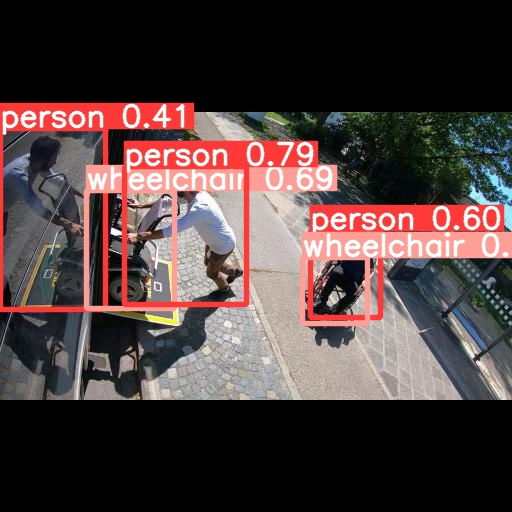

In [ ]:
# %cd /content/yolov5/

!python detect.py --source /content/drive/MyDrive/머신러닝YOLO/dataset/test/images/ \
                  --weights /content/drive/MyDrive/머신러닝YOLO/result/weights/best.pt \
                  --name detectResult

resultImg = glob('/content/yolov5/runs/detect/detectResult/*.jpg')[0]
display.Image(filename=resultImg, width=600)

In [ ]:
# 드라이브저장

!cp -r /content/yolov5/runs/detect/detectResult /content/drive/MyDrive/머신러닝YOLO/detectResult

---